<a href="https://colab.research.google.com/github/kooosee/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## openCVを使ってロールプレイのゲームを作る



In [1]:
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
clearscreen()
setup(2000,800)
turtle1=Turtle()
turtle1.shape('turtle')
turtle1.speed(13)
turtle1.penup()
turtle1.goto(-900,-350)
turtle1.pendown()
def koh(n,length):
  if n==0:
    turtle1.forward(length)
    return
  length2=length/3
  koh(n-1,length2)
  turtle1.left(60)
  koh(n-1,length2)
  turtle1.right(120)
  koh(n-1,length2)
  turtle1.left(60)
  koh(n-1,length2)
print('コッホ曲線')
while True:
  n=int(input('5字以下の数字を入力してください '))
  if n>5:
    print('error 数が大きすぎます')
    continue
  else:
    break
length=1000
koh(n,length

コッホ曲線
5字以下の数字を入力してください 4


ルール説明
5種類:◯,□,↘︎,＋,× それぞれ3枚ずつ計15枚のカードを使う。


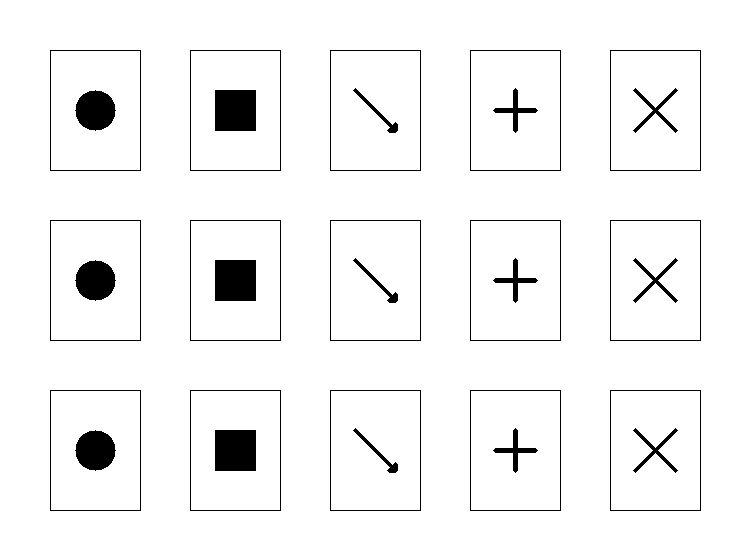

この内から無作為に除かれた1枚のカードのマークを当てる。
ゲーム開始時にお互いにそれぞれ3枚ずつカードが配られ，先手と後手を決めターン毎に交互にマークを答える。1ターン目のみカードを好きな枚数オープンでき，
オープンした枚数新たにカードを得られる。オープンするカードは画面の右側のカードからオープンされる。
先に除けれたカードのマークを当てた方の勝利。


In [2]:
print('ルール説明\n5種類:◯,□,↘︎,＋,× それぞれ3枚ずつ計15枚のカードを使う。')
img = np.zeros( (560, 750, 3), np.uint8 ) 
img.fill( 255 )
for i in range(5):
  for j in range(3):
     cv2.rectangle(img,(50+140*i,50+170*j),(140+140*i,170+170*j),color=(0,0,0))
for a in range(3):
  cv2.circle(img,(95,110+170*a),20,color=(0),thickness=-1)
  cv2.rectangle(img,(215,90+170*a),(255,130+170*a),color=(0),thickness=-1)
  cv2.arrowedLine(img,(355,90+170*a),(395,130+170*a),color=(0),thickness=3)
  cv2.line(img,(515,90+170*a),(515,130+170*a),color=(0),thickness=3)
  cv2.line(img,(495,110+170*a),(535,110+170*a),color=(0),thickness=3)
  cv2.line(img,(635,90+170*a),(675,130+170*a),color=(0),thickness=3)
  cv2.line(img,(635,130+170*a),(675,90+170*a),color=(0),thickness=3)
cv2_imshow(img)
def make_circle(a,b,c,img):
  cv2.circle(img,(a,b),c,color=(0),thickness=-1)

def make_rectangle(a,b,c,d,img):
  cv2.rectangle(img,(a,b),(c,d),color=(0),thickness=-1)

def make_ya(a,b,c,d,img):
  cv2.arrowedLine(img,(a,b),(c,d),color=(0),thickness=3)

def make_pulus(a,b,c,d,e,f,g,h,img):
  cv2.line(img,(a,b),(c,d),color=(0),thickness=3)
  cv2.line(img,(e,f),(g,h),color=(0),thickness=3)

def make_batsu(a,b,c,d,e,f,g,h,img):
  cv2.line(img,(a,b),(c,d),color=(0),thickness=3)
  cv2.line(img,(e,f),(g,h),color=(0),thickness=3)

print('この内から無作為に除かれた1枚のカードのマークを当てる。\nゲーム開始時にお互いにそれぞれ3枚ずつカードが配られ，先手と後手を決めターン毎に交互にマークを答える。1ターン目のみカードを好きな枚数オープンでき，\nオープンした枚数新たにカードを得られる。オープンするカードは画面の右側のカードからオープンされる。\n先に除けれたカードのマークを当てた方の勝利。')


In [3]:
print('先手と後手を決めて，先手にパソコンを渡してください')

先手と後手を決めて，先手にパソコンを渡してください


スタート
あなたのカード


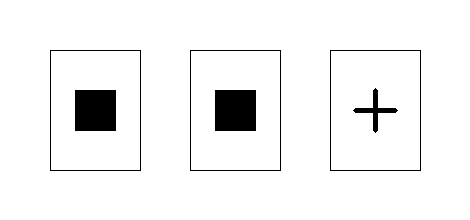

パソコンを渡してください


In [11]:
marklist=['○','□','↘︎','＋','×','○','□','↘︎','＋','×','○','□','↘︎','＋','×']
num=np.random.randint(0,15)
ans=marklist[num]
marklist.pop(num)

menum1=np.random.randint(0,14)
mecard1=marklist[menum1]
marklist.pop(menum1)

menum2=np.random.randint(0,13)
mecard2=marklist[menum2]
marklist.pop(menum2)

menum3=np.random.randint(0,12)
mecard3=marklist[menum3]
marklist.pop(menum3)


younum1=np.random.randint(0,11)
youcard1=marklist[younum1]
marklist.pop(younum1)

younum2=np.random.randint(0,10)
youcard2=marklist[younum2]
marklist.pop(younum2)

younum3=np.random.randint(0,9)
youcard3=marklist[younum3]
marklist.pop(younum3)

print('スタート\nあなたのカード')
img2 = np.zeros( (220, 470, 3), np.uint8 ) 
img2.fill( 255 )
for i in range(3):
  cv2.rectangle(img2,(50+140*i,50),(140+140*i,170),color=(0))
if mecard1=='○':
  make_circle(95,110,20,img2)
elif mecard1=='□':
  make_rectangle(75,90,115,130,img2)
elif mecard1=='↘︎':
  make_ya(75,90,115,130,img2)
elif mecard1=='＋':
  make_pulus(95,90,95,130,75,110,115,110,img2)
elif mecard1=='×':
  make_batsu(75,90,115,130,115,90,75,130,img2)
if mecard2=='○':
  make_circle(235,110,20,img2)
elif mecard2=='□':
  make_rectangle(215,90,255,130,img2)
elif mecard2=='↘︎':
  make_ya(215,90,255,130,img2)
elif mecard2=='＋':
  make_pulus(235,90,235,130,215,110,255,110,img2)
elif mecard2=='×':
  make_batsu(215,90,255,130,255,90,215,130,img2)
if mecard3=='○':
  make_circle(375,110,20,img2)
elif mecard3=='□':
  make_rectangle(355,90,395,130,img2)
elif mecard3=='↘︎':
  make_ya(355,90,395,130,img2)
elif mecard3=='＋':
  make_pulus(375,90,375,130,355,110,395,110,img2)
elif mecard3=='×':
  make_batsu(355,90,395,130,395,90,355,130,img2)
cv2_imshow(img2)
print('パソコンを渡してください')

あなたのカード


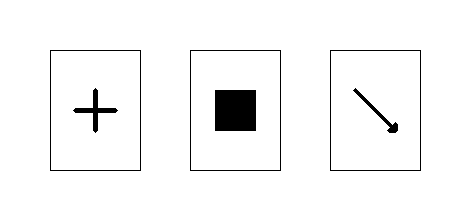

パソコンを渡してください














In [12]:
print('あなたのカード')
img3 = np.zeros( (220, 470, 3), np.uint8 ) 
img3.fill( 255 )
for i in range(3):
  cv2.rectangle(img3,(50+140*i,50),(140+140*i,170),color=(0))
if youcard1=='○':
  make_circle(95,110,20,img3)
elif youcard1=='□':
  make_rectangle(75,90,115,130,img3)
elif youcard1=='↘︎':
  make_ya(75,90,115,130,img3)
elif youcard1=='＋':
  make_pulus(95,90,95,130,75,110,115,110,img3)
elif youcard1=='×':
  make_batsu(75,90,115,130,115,90,75,130,img3)
if youcard2=='○':
  make_circle(235,110,20,img3)
elif youcard2=='□':
  make_rectangle(215,90,255,130,img3)
elif youcard2=='↘︎':
  make_ya(215,90,255,130,img3)
elif youcard2=='＋':
  make_pulus(235,90,235,130,215,110,255,110,img3)
elif youcard2=='×':
  make_batsu(215,90,255,130,255,90,215,130,img3)
if youcard3=='○':
  make_circle(375,110,20,img3)
elif youcard3=='□':
  make_rectangle(355,90,395,130,img3)
elif youcard3=='↘︎':
  make_ya(355,90,395,130,img3)
elif youcard3=='＋':
  make_pulus(375,90,375,130,355,110,395,110,img3)
elif youcard3=='×':
  make_batsu(355,90,395,130,395,90,355,130,img3)
cv2_imshow(img3)
print('パソコンを渡してください\n\n\n\n\n\n\n\n\n\n\n\n')

In [ ]:
img4 = np.zeros( (220, 470, 3), np.uint8 ) 
img4.fill( 255 )
first_open=int(input('オープンするカードの枚数を入力してください'))
while True:
  if first_open==0:
    print('パソコンを渡してください')
    break
  elif first_open==1:
    print('パソコンを共有してください')
    cv2.rectangle(img4,(50,50),(140,170),color=(0))
    if mecard1=='○':
      make_circle(95,110,20,img4)
    elif mecard1=='□':
      make_rectangle(75,90,115,130,img4)
    elif mecard1=='↘︎':
      make_ya(75,90,115,130,img4)
    elif mecard1=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img4)
    elif mecard1=='×':
      make_batsu(75,90,115,130,115,90,75,130,img4)
    cv2_imshow(img4)
    break
  elif first_open==2:
    print('パソコンを共有してください')
    for i in range(2):
      cv2.rectangle(img4,(50+140*i,50),(140+140*i,170),color=(0))
    if mecard1=='○':
      make_circle(95,110,20,img4)
    elif mecard1=='□':
      make_rectangle(75,90,115,130,img4)
    elif mecard1=='↘︎':
      make_ya(75,90,115,130,img4)
    elif mecard1=='＋':
      make_pulus(95,90,95,130,75,110,115,110,img4)
    elif mecard1=='×':
      make_batsu(75,90,115,130,115,90,75,130,img4)
    if mecard2=='○':
      make_circle(235,110,20,img4)
    elif mecard2=='□':
      make_rectangle(215,90,255,130,img4)
    elif mecard2=='↘︎':
      make_ya(215,90,255,130,img4)
    elif mecard2=='＋':
      make_pulus(235,90,235,130,215,110,255,110,img4)
    elif mecard2=='×':
      make_batsu(215,90,255,130,255,90,215,130,img4)
    cv2_imshow(img4)
    break
  elif first_open==3:
    print('パソコンを共有してください')
    cv2_imshow(img3)
    break
  else:
    continue